<a href="https://colab.research.google.com/github/Yekateryna/Inf_systems/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cinema1.csv to cinema1.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cinema1.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5050 non-null   int64  
 1   color                      5031 non-null   object 
 2   director_name              4946 non-null   object 
 3   num_critic_for_reviews     5000 non-null   float64
 4   duration                   5035 non-null   float64
 5   director_facebook_likes    4946 non-null   float64
 6   actor_3_facebook_likes     5027 non-null   float64
 7   actor_2_name               5037 non-null   object 
 8   actor_1_facebook_likes     5043 non-null   float64
 9   gross                      4161 non-null   float64
 10  genres                     5050 non-null   object 
 11  actor_1_name               5043 non-null   object 
 12  movie_title                5050 non-null   object 
 13  num_voted_users            5050 non-null   objec

In [5]:
numerical_values = [feature for feature in df.columns if df[feature].dtypes !='O']
print(len(numerical_values))
print(numerical_values)

17
['Unnamed: 0', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'Unnamed: 28', 'war_symb_title', 'point_symb_title']


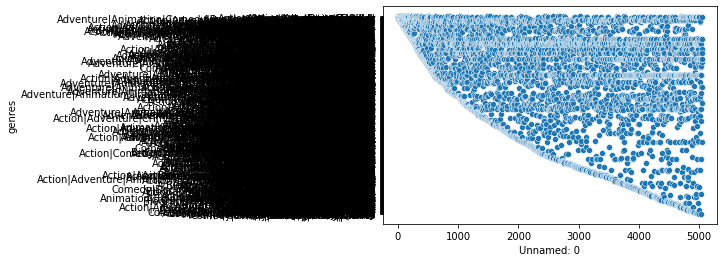

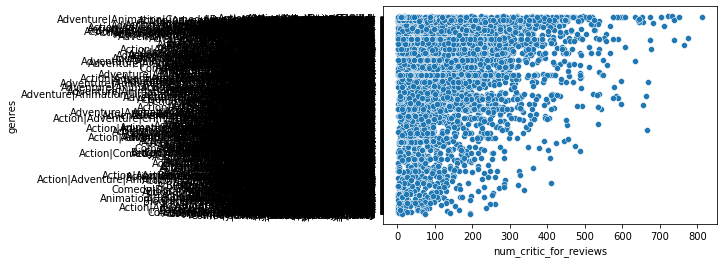

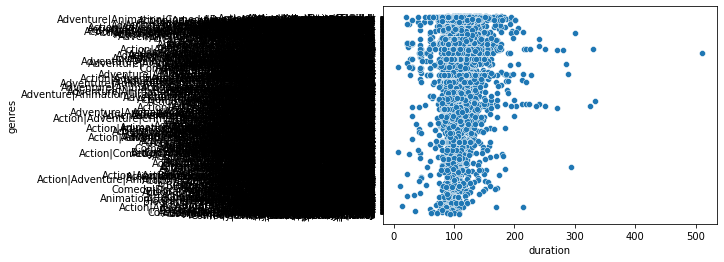

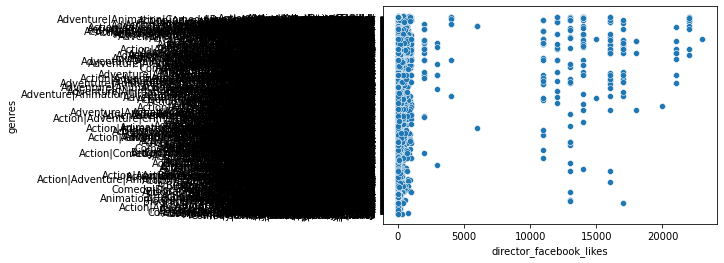

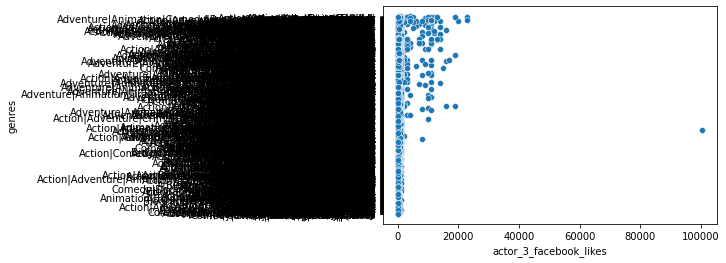

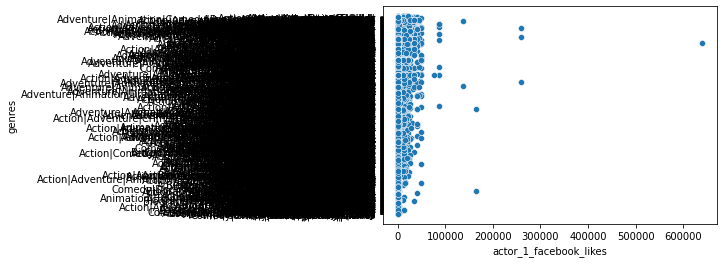

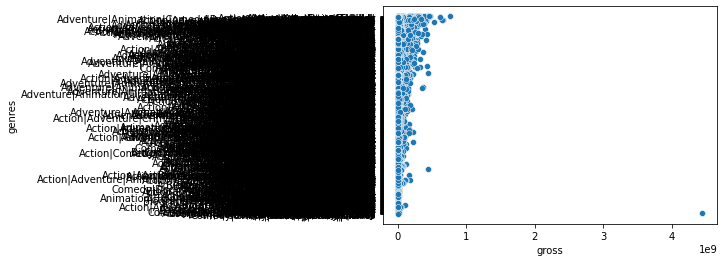

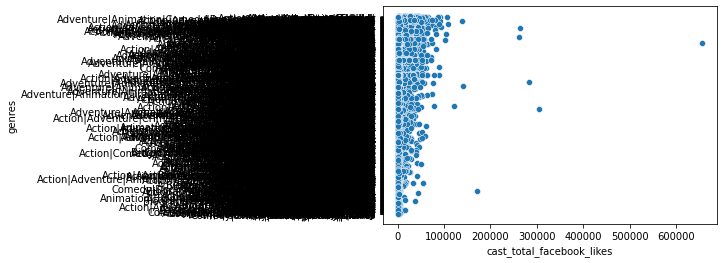

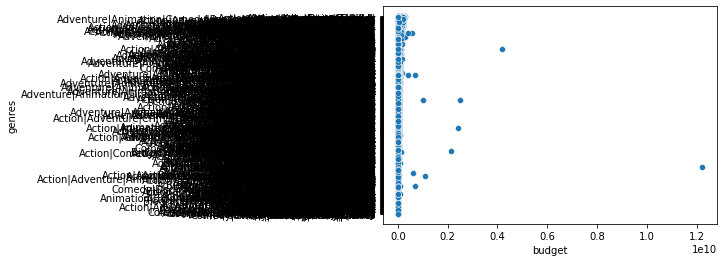

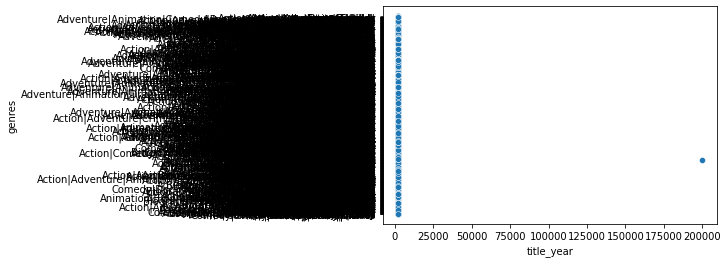

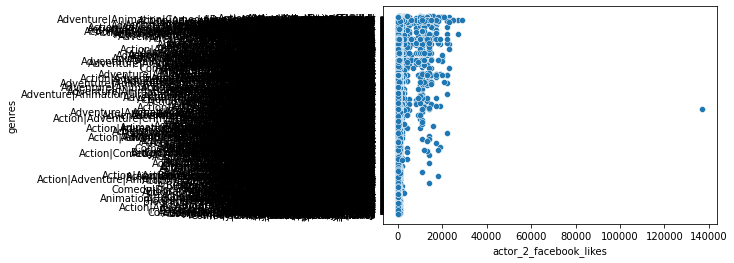

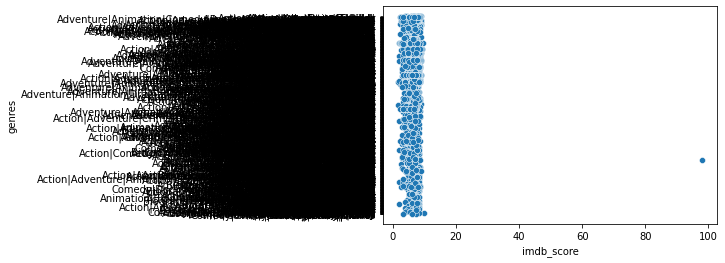

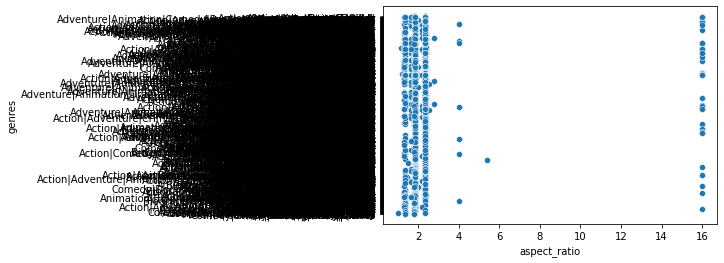

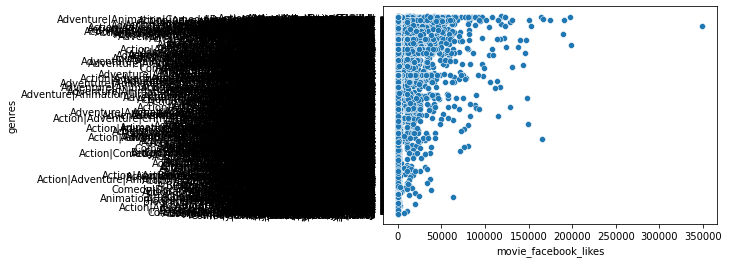

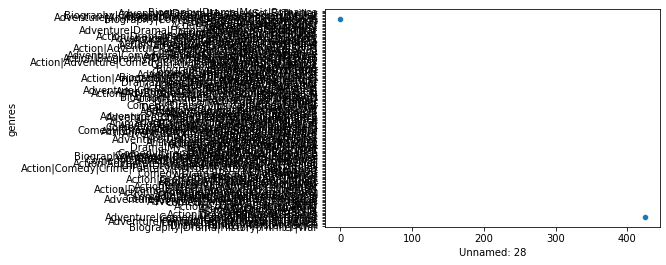

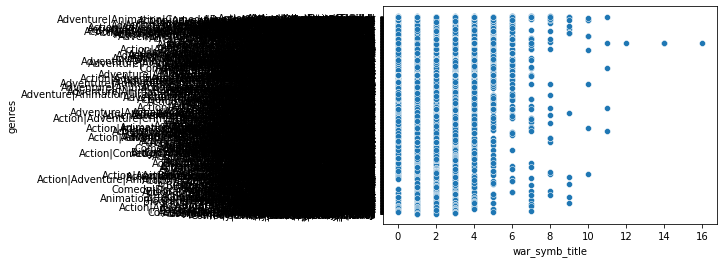

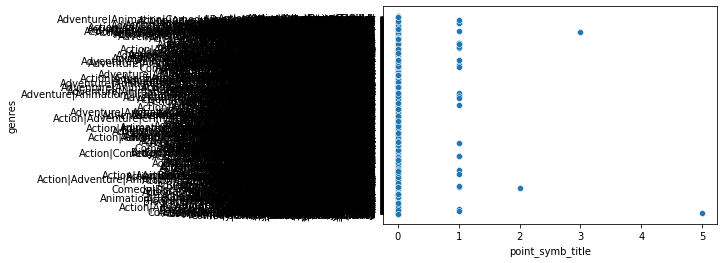

In [6]:
for feature in numerical_values:
  sns.scatterplot(x=df[feature], y=df['genres'])
  plt.show()

In [7]:
print('size of dataframe', len(df))

size of dataframe 5050


In [8]:
# calculating missing values by columns
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("In dataframe we got " + str(df.shape[1]) + " columns.\n"    
            "Got " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with no value.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('Amount of columns %d going to be deleted.' % len(missing_columns), 'those columns are gonna be deleted: ', missing_columns)

# Drop the columns
df = df.drop(columns = missing_columns)

In dataframe we got 32 columns.
Got 22 columns with no value.
Amount of columns 1 going to be deleted. those columns are gonna be deleted:  ['Unnamed: 28']


In [9]:
# replacing NaN on -1 value
df = df.replace("-1", -1)
df = df.fillna(-1)

In [10]:
# saving testing dataframe
df.to_csv(path_or_buf='testing_cinema1.csv')

In [12]:
# using json to  show dataframe columns
def prettify(iterable):
    return json.dumps(iterable, indent=4)

In [13]:
print('There are those columns in dataframe:\n')
df.info()

There are those columns in dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5050 non-null   int64  
 1   color                      5050 non-null   object 
 2   director_name              5050 non-null   object 
 3   num_critic_for_reviews     5050 non-null   float64
 4   duration                   5050 non-null   float64
 5   director_facebook_likes    5050 non-null   float64
 6   actor_3_facebook_likes     5050 non-null   float64
 7   actor_2_name               5050 non-null   object 
 8   actor_1_facebook_likes     5050 non-null   float64
 9   gross                      5050 non-null   float64
 10  genres                     5050 non-null   object 
 11  actor_1_name               5050 non-null   object 
 12  movie_title                5050 non-null   object 
 13  num_voted

In [14]:
#genre distribution by ratings, profit and likes
genres_likes_df = df[['genres', 'movie_facebook_likes', 'gross', 'imdb_score']]

In [17]:
#counting total likes, profit and ratings for every of genre
from collections import Counter
# Add value to a counter if there`s no such key
# Else add new value to existing

def add_or_sum_to_counter(c: Counter, key: str, value: float):
    if value == -1:
        return
    
    if key in c.keys():
        c[key] += value
    else:
        c[key] = value
    

genres_likes = Counter()
genres_gross = Counter()
genres_score = Counter()

# Count how many films of each genre to do normalization

genres_films_count = Counter()
for index, row in genres_likes_df.iterrows():
    genres_list = row['genres'].split('|')
    for genre in genres_list:
        add_or_sum_to_counter(genres_likes, genre, float(row['movie_facebook_likes']))
        add_or_sum_to_counter(genres_gross, genre, float(row['gross']))
        add_or_sum_to_counter(genres_score, genre, float(row['imdb_score']))
        add_or_sum_to_counter(genres_films_count, genre, 1)

print('Тop-3 genres total by likes\n', prettify(genres_likes.most_common(3)))
print('Тop-3 genres total by profit\n', prettify(genres_gross.most_common(3)))
print('Тop-3 genres total by rating\n', prettify(genres_score.most_common(3)))

Тop-3 genres total by likes
 [
    [
        "Drama",
        19963537.0
    ],
    [
        "Adventure",
        12201535.0
    ],
    [
        "Action",
        12021768.0
    ]
]
Тop-3 genres total by profit
 [
    [
        "Adventure",
        79806607293.0
    ],
    [
        "Comedy",
        77439082951.0
    ],
    [
        "Action",
        75145540469.0
    ]
]
Тop-3 genres total by rating
 [
    [
        "Drama",
        17545.200000000023
    ],
    [
        "Comedy",
        11732.000000000007
    ],
    [
        "Thriller",
        9002.000000000007
    ]
]


In [18]:
# doing normalization before genre distribution
def take_avg(c: Counter, key: str, value: float):
    # It's easier to ask for forgiveness than getting permission
    try:
        c[key] = c[key] / value
    except KeyError:
        pass

for genre, films_count in genres_films_count.items():
    take_avg(genres_likes, genre, films_count)
    take_avg(genres_gross, genre, films_count)
    take_avg(genres_score, genre, films_count)
    

print('Тop-3 genres average by likes', genres_likes.most_common(3))
print('Тop-3 genres average by profit',genres_gross.most_common(3))
print('Тop-3 genres average by rating',genres_score.most_common(3))

Тop-3 genres average by likes [('Sci-Fi', 14889.781199351703), ('Adventure', 13219.431202600217), ('Fantasy', 11238.175122749592)]
Тop-3 genres average by profit [('Animation', 108078638.77366255), ('Adventure', 86464363.26435536), ('Family', 77035505.01465201)]
Тop-3 genres average by rating [('Film-Noir', 7.633333333333334), ('News', 7.533333333333334), ('Documentary', 7.202459016393445)]


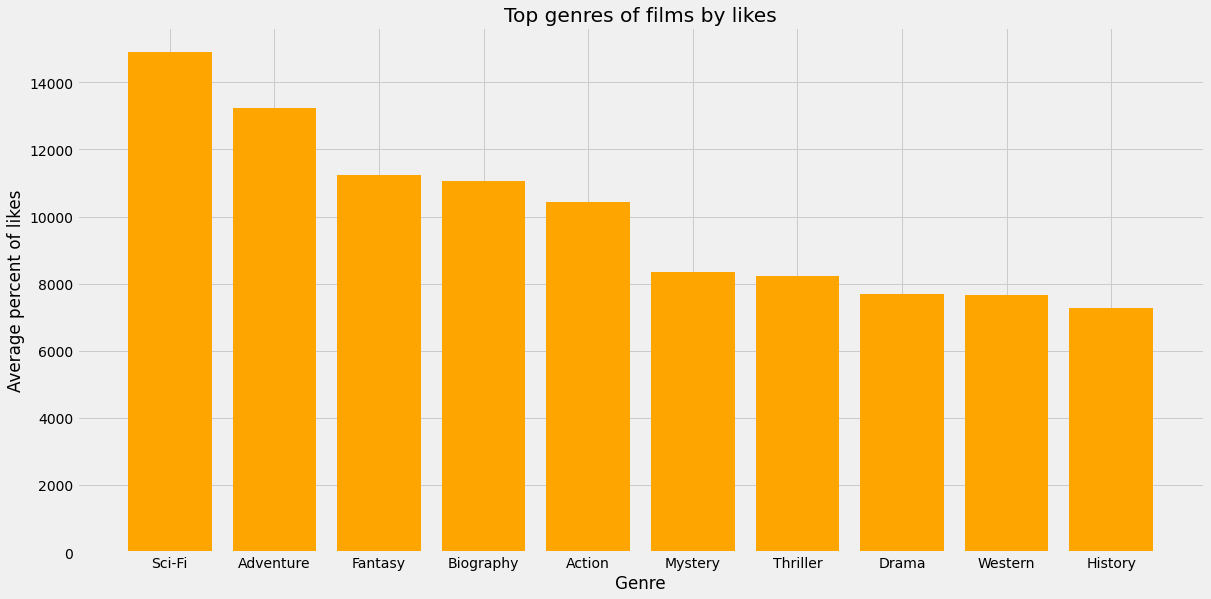

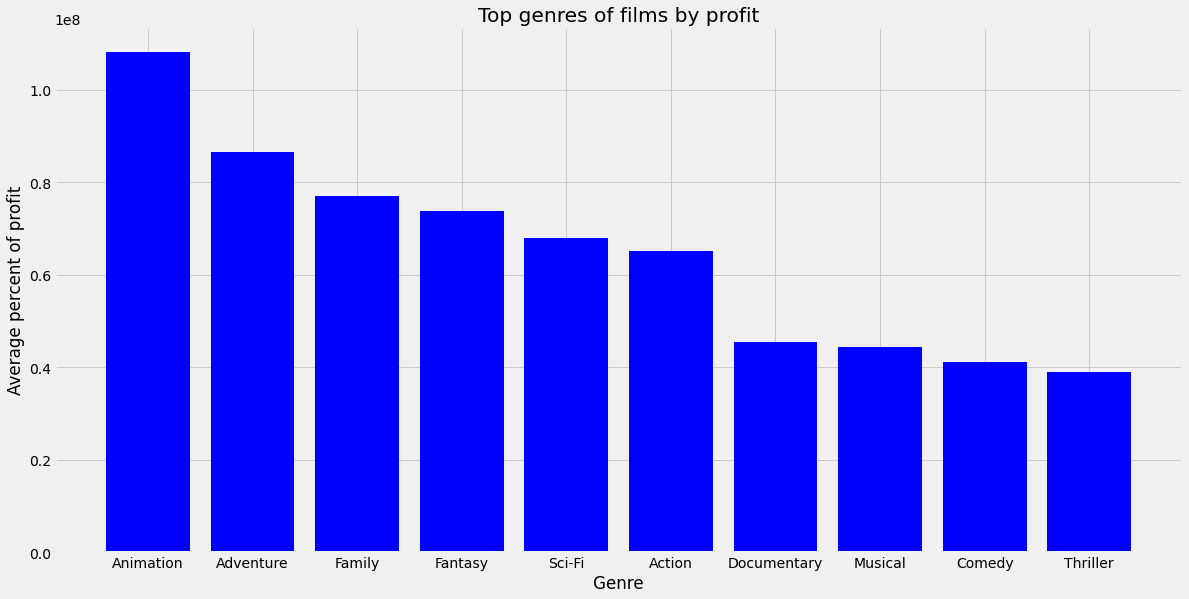

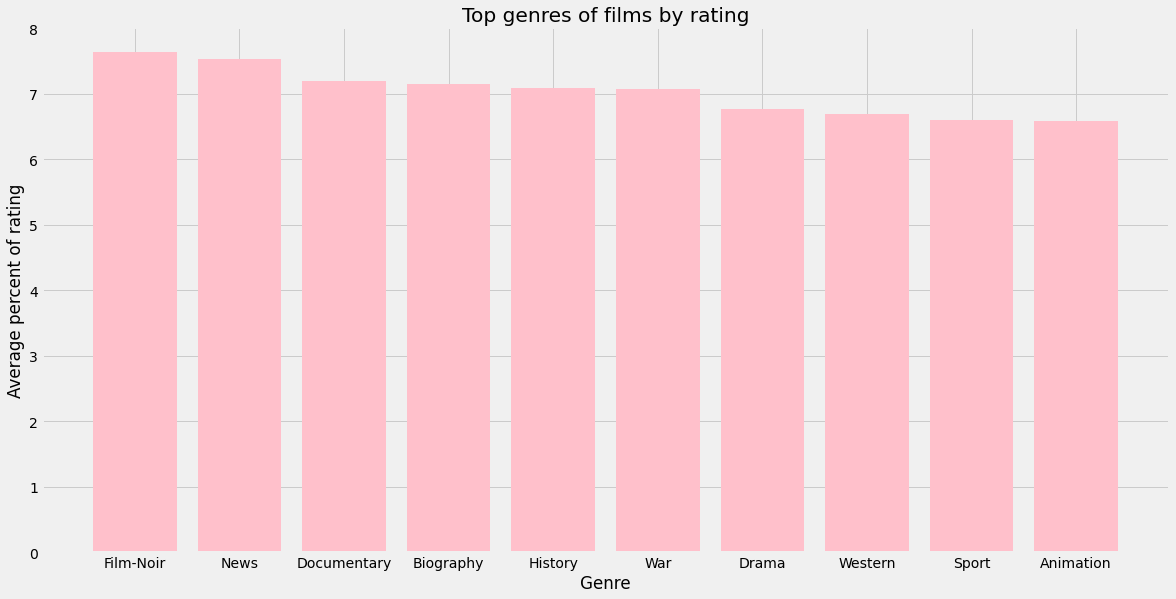

In [19]:
# making gaphics

plt.style.use('fivethirtyeight')

top_genres_by_likes = dict(genres_likes.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_genres_by_likes.keys()), list(top_genres_by_likes.values()), color='orange') 
plt.xlabel('Genre') 
plt.ylabel('Average percent of likes') 
plt.title('Top genres of films by likes', color='black')
plt.savefig('Top genres of films by likes.png')
plt.show() 

top_genres_by_gross = dict(genres_gross.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_genres_by_gross.keys()), list(top_genres_by_gross.values()), color='blue')  
plt.xlabel('Genre') 
plt.ylabel('Average percent of profit') 
plt.title('Top genres of films by profit', color='black')
plt.savefig('Top genres of films by profit.png')
plt.show() 

top_genres_by_score = dict(genres_score.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_genres_by_score.keys()), list(top_genres_by_score.values()), color='pink')  
plt.xlabel('Genre') 
plt.ylabel('Average percent of rating') 
plt.title('Top genres of films by rating', color='black') 
plt.savefig('Top genres of films by rating.png')
plt.show() 

In [21]:
#top 20 bundles actor-director which give more money at cinemas
#making bundles dactor-director. then count statistics for each

def count_director_actor_gross(c: Counter(), director: str, actor: str, gross: float):
    if director != -1 and actor != -1 and gross != -1:
        director_actor_pair = director.strip() + ' and ' + actor.strip()
        if director_actor_pair in c:
            c[director_actor_pair] += gross
        else:
            c[director_actor_pair] = gross

director_actor_gross = Counter()
for index, row in df[['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'gross']].iterrows():
    director = row['director_name']
    gross = row['gross']
    count_director_actor_gross(director_actor_gross, director, row['actor_1_name'], gross)
    count_director_actor_gross(director_actor_gross, director, row['actor_2_name'], gross)
    count_director_actor_gross(director_actor_gross, director, row['actor_3_name'], gross)

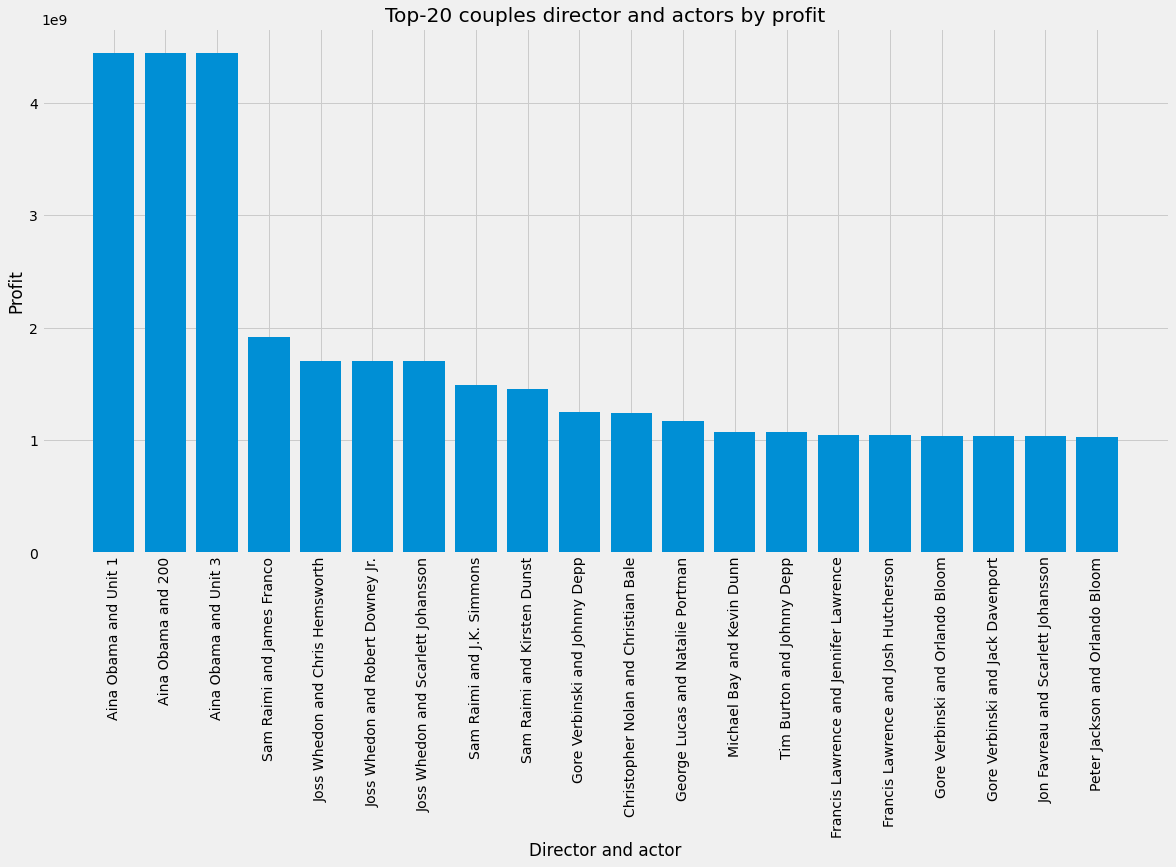

In [22]:
#making graphics of top 20 actor-director
top_dir_act_by_gross = dict(director_actor_gross.most_common(20))
plt.figure(figsize=(18, 9))
heights = [10, 20, 15]
bars = list(top_dir_act_by_gross.keys())
y_pos = range(len(bars))
plt.bar(y_pos, list(top_dir_act_by_gross.values())) 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, color='black')
plt.xlabel('Director and actor') 
plt.ylabel('Profit') 
plt.title('Top-20 couples director and actors by profit', color='black')
plt.savefig('Top-20 couples director and actors by profit.png')
plt.show()

In [23]:
#Films from which country have best ratings

country_sum_score = Counter()
counter_film_count = Counter()
for index, row in df[['country', 'imdb_score']].iterrows():
    country = row['country']
    score = row['imdb_score']
    if country == -1 or score == -1:
        continue
    add_or_sum_to_counter(country_sum_score, country, score)
    add_or_sum_to_counter(counter_film_count, country, 1)
print('Amount of films by countries \n', prettify(counter_film_count))


Amount of films by countries 
 {
    "USA": 3807,
    "UK": 448,
    "New Zealand": 15,
    "Canada": 131,
    "Australia": 55,
    "Belgium": 4,
    "Japan": 23,
    "Germany": 97,
    "China": 30,
    "France": 154,
    "New Line": 1,
    "Mexico": 17,
    "Spain": 33,
    "Hong Kong": 17,
    "Czech Republic": 3,
    "India": 34,
    "Soviet Union": 1,
    "South Korea": 14,
    "Peru": 1,
    "Italy": 23,
    "Russia": 11,
    "Aruba": 1,
    "Denmark": 11,
    "Libya": 1,
    "Ireland": 12,
    "South Africa": 8,
    "Iceland": 3,
    "Switzerland": 3,
    "Romania": 4,
    "West Germany": 3,
    "Chile": 1,
    "Netherlands": 5,
    "Hungary": 2,
    "Panama": 1,
    "Greece": 2,
    "Sweden": 6,
    "Norway": 8,
    "Taiwan": 2,
    "Official site": 1,
    "Cambodia": 1,
    "Thailand": 5,
    "Slovakia": 1,
    "Bulgaria": 1,
    "Iran": 4,
    "Poland": 5,
    "Georgia": 1,
    "Turkey": 1,
    "Nigeria": 1,
    "Brazil": 8,
    "Finland": 1,
    "Bahamas": 1,
    "Argentina":

In [25]:
#find average profit
for country, score in country_sum_score.items():
    country_sum_score[country] = score / counter_film_count[country]
print('Average rating of films by countries \n', prettify(country_sum_score))

Average rating of films by countries 
 {
    "USA": 0.0016726615267563542,
    "UK": 0.015219427614795916,
    "New Zealand": 0.4853333333333333,
    "Canada": 0.04728162694481674,
    "Australia": 0.11844628099173556,
    "Belgium": 1.4,
    "Japan": 0.3022684310018903,
    "Germany": 0.06536295036667018,
    "China": 0.22077777777777774,
    "France": 0.04336734693877551,
    "New Line": 4.4,
    "Mexico": 0.3986159169550173,
    "Spain": 0.2067952249770431,
    "Hong Kong": 0.3965397923875433,
    "Czech Republic": 2.322222222222222,
    "India": 0.19212802768166096,
    "Soviet Union": 8.1,
    "South Korea": 0.44693877551020417,
    "Peru": 5.4,
    "Italy": 0.29886578449905477,
    "Russia": 0.5528925619834711,
    "Aruba": 4.8,
    "Denmark": 0.6520661157024793,
    "Libya": 8.4,
    "Ireland": 0.5652777777777779,
    "South Africa": 0.8046875,
    "Iceland": 2.444444444444444,
    "Switzerland": 1.9666666666666666,
    "Romania": 1.65,
    "West Germany": 2.422222222222222,
   

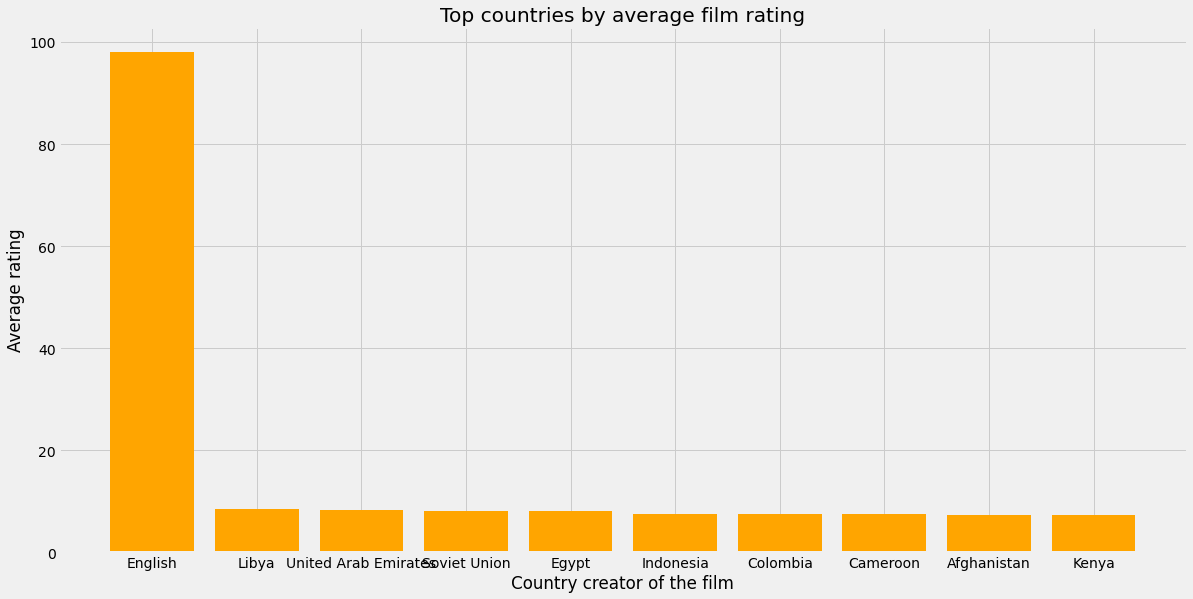

In [26]:
top_film_countries_by_rate = dict(country_sum_score.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_film_countries_by_rate.keys()), list(top_film_countries_by_rate.values()), color='orange')  
plt.xlabel('Country creator of the film') 
plt.ylabel('Average rating') 
plt.title('Top countries by average film rating', color='black')
plt.savefig('Top countries by average film rating.png')
plt.show() 

In [27]:
#what plot in average contain films of drama genre
drama_films = df[df['genres'].str.contains('Drama')]

In [28]:
drama_films_plot_keywords_list = []
drama_films_count = len(drama_films)
for index, plot_keywords in drama_films['plot_keywords'].iteritems():
    if plot_keywords != -1:
        [drama_films_plot_keywords_list.append(keyword) for keyword in plot_keywords.split('|')]
drama_films_plot_keywords_counter = Counter(drama_films_plot_keywords_list)
print('All films of drama genre: ', drama_films_count)
print('Top-25 most used words in plot of dramatic films:')
for word in drama_films_plot_keywords_counter.most_common(25):
    print(word[0], " ", word[1])

All films of drama genre:  2594
Top-25 most used words in plot of dramatic films:
love   143
friend   107
murder   83
death   76
police   70
friendship   56
school   52
new york city   51
high school   46
boy   45
drugs   43
marriage   41
revenge   37
lawyer   35
money   35
female protagonist   34
fbi   33
singer   33
male nudity   32
student   32
hospital   31
sex   31
prison   30
secret   30
texas   30


In [29]:
plot_keywords_count = sum(drama_films_plot_keywords_counter.values())
for word, count in drama_films_plot_keywords_counter.items():
    drama_films_plot_keywords_counter[word] = (count /  plot_keywords_count) * 100

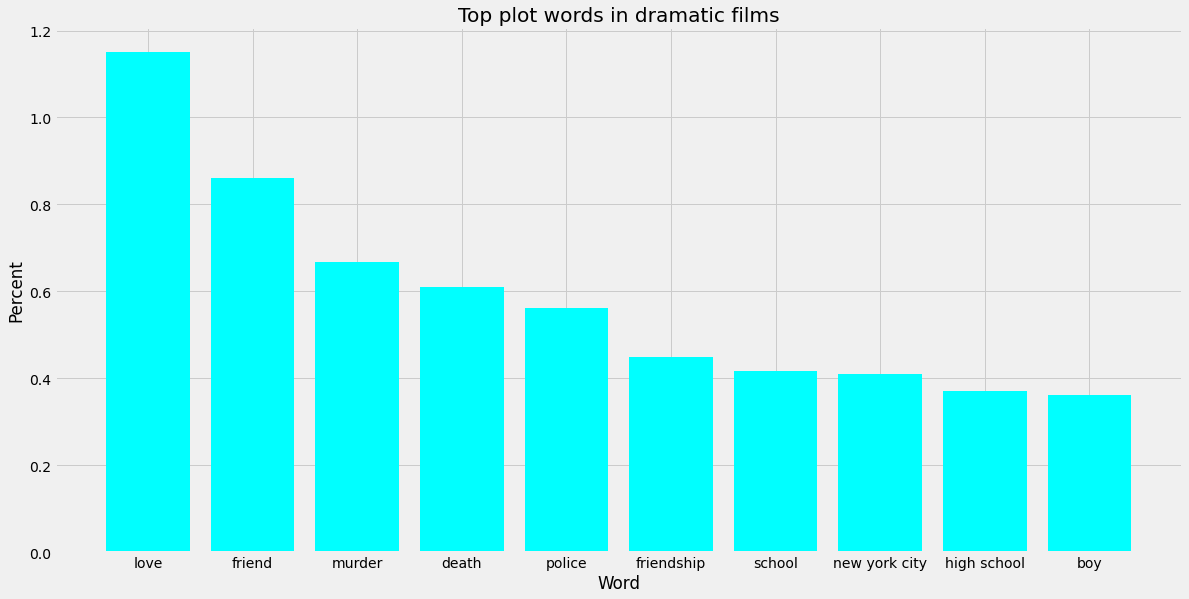

In [31]:
top_films_plot_keywords = dict(drama_films_plot_keywords_counter.most_common(10))
plt.figure(figsize=(18, 9))
plt.bar(list(top_films_plot_keywords.keys()), list(top_films_plot_keywords.values()), color='cyan')  
plt.xlabel('Word') 
plt.ylabel('Percent') 
plt.title('Top plot words in dramatic films', color='black') 
plt.savefig('Top plot words in dramatic films.png')
plt.show() 


In [32]:
#does age rating affect movie budget
content_rating_budget = Counter()
content_rating_films_count = Counter()
for index, row in df[['content_rating', 'budget']].iterrows():
    content_rating = row['content_rating']
    if content_rating != -1: 
        add_or_sum_to_counter(content_rating_budget, content_rating, row['budget'])
        add_or_sum_to_counter(content_rating_films_count, content_rating, 1)
print('The total budget of films by age limit:\n', prettify(content_rating_budget))
print('Number of films by age limit:\n', prettify(content_rating_films_count))


The total budget of films by age limit:
 {
    "PG-13": 74983648830.0,
    "PG": 31840328920.0,
    "G": 4814907000.0,
    "R": 65952542481.0,
    "TV-14": 18200000.0,
    "TV-G": 18350000.0,
    "Not Rated": 398649940.0,
    "Unrated": 249555595.0,
    "Approved": 207123765.0,
    "NC-17": 55585000.0,
    "X": 43400000.0,
    "TV-MA": 34000000.0,
    "GP": 22200000.0,
    "Passed": 27282785.0,
    "M": 18800000.0,
    "TV-PG": 9600000.0
}
Number of films by age limit:
 {
    "PG-13": 1461,
    "PG": 701,
    "G": 112,
    "R": 2119,
    "TV-14": 30,
    "TV-PG": 13,
    "TV-MA": 20,
    "TV-G": 10,
    "Not Rated": 116,
    "Unrated": 62,
    "Approved": 55,
    "TV-Y": 1,
    "NC-17": 7,
    "X": 13,
    "TV-Y7": 1,
    "GP": 6,
    "Passed": 9,
    "M": 5,
    "USA": 1
}


In [33]:
for content_rating in content_rating_budget.keys():
    take_avg(content_rating_budget, content_rating, content_rating_films_count[content_rating])
print('Average budget of films by age rating: \n', prettify(content_rating_budget))

Average budget of films by age rating: 
 {
    "PG-13": 51323510.49281314,
    "PG": 45421296.60485022,
    "G": 42990241.071428575,
    "R": 31124371.15667768,
    "TV-14": 606666.6666666666,
    "TV-G": 1835000.0,
    "Not Rated": 3436637.4137931033,
    "Unrated": 4025090.2419354836,
    "Approved": 3765886.6363636362,
    "NC-17": 7940714.285714285,
    "X": 3338461.5384615385,
    "TV-MA": 1700000.0,
    "GP": 3700000.0,
    "Passed": 3031420.5555555555,
    "M": 3760000.0,
    "TV-PG": 738461.5384615385
}


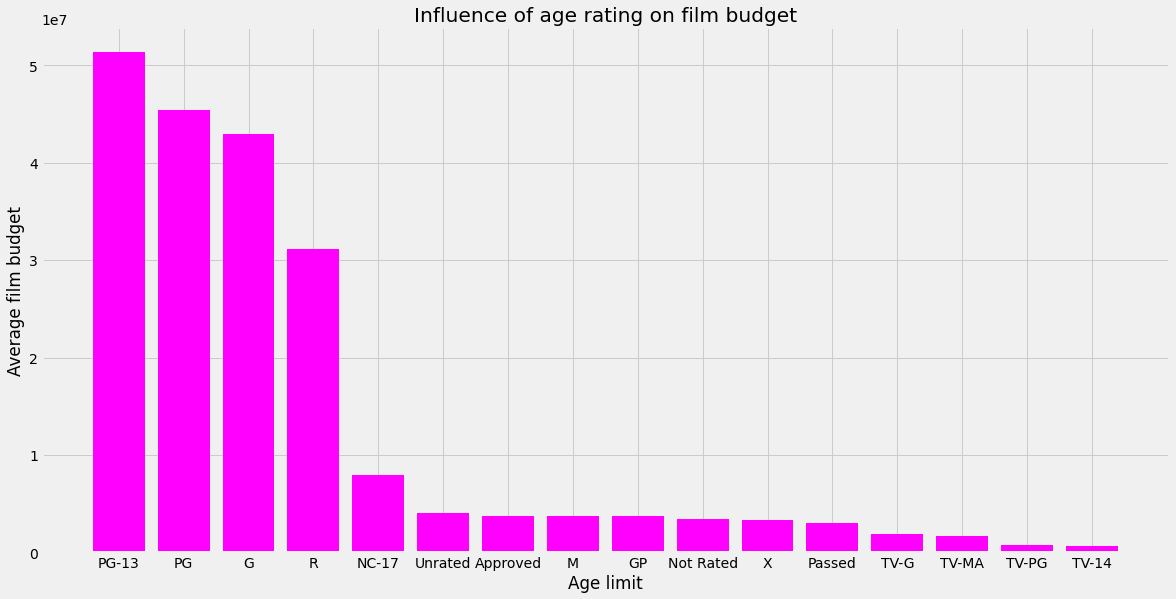

In [34]:
content_rating_budget_dict = dict(content_rating_budget.most_common())
plt.figure(figsize=(18, 9))
plt.bar(list(content_rating_budget_dict.keys()), list(content_rating_budget_dict.values()), color='magenta')  
plt.xlabel('Age limit') 
plt.ylabel('Average film budget') 
plt.title('Influence of age rating on film budget', color='black') 
plt.savefig('Influence of age rating on film budget.png')
plt.show() 

In [35]:
content_ratings = list(content_rating_budget_dict.keys())
biggest_budgets_by_content_rating = Counter()
for content_rating in content_ratings:
    biggest_budgets_by_content_rating[content_rating] = df[df['content_rating'] == content_rating]['budget'].max()
    
print('Rating of max budget films by categories:\n', prettify(biggest_budgets_by_content_rating.most_common()))

Rating of max budget films by categories:
 [
    [
        "R",
        12215500000.0
    ],
    [
        "PG-13",
        2400000000.0
    ],
    [
        "PG",
        1000000000.0
    ],
    [
        "G",
        200000000.0
    ],
    [
        "Unrated",
        103000000.0
    ],
    [
        "NC-17",
        45000000.0
    ],
    [
        "Not Rated",
        45000000.0
    ],
    [
        "TV-MA",
        34000000.0
    ],
    [
        "Approved",
        31115000.0
    ],
    [
        "GP",
        12000000.0
    ],
    [
        "TV-14",
        12000000.0
    ],
    [
        "X",
        8000000.0
    ],
    [
        "Passed",
        7623000.0
    ],
    [
        "M",
        7000000.0
    ],
    [
        "TV-G",
        7000000.0
    ],
    [
        "TV-PG",
        5000000.0
    ]
]


In [37]:
#uncorrect data finding part

print(df[df['country'] == 'English'][['movie_title', 'movie_imdb_link', 'imdb_score']])


     movie_title                                movie_imdb_link  imdb_score
5038   Sanctuary  nudity|party|pirate|swimsuit|three word title        98.0


In [38]:
df = df.drop(df[df['country'] == 'English'].index)
print(len(df))

5049


In [41]:
print(df[df['director_name'] == 'Aina Obama']
      [['movie_title', 'movie_imdb_link', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']])

Empty DataFrame
Columns: [movie_title, movie_imdb_link, director_name, actor_1_name, actor_2_name, actor_3_name]
Index: []


In [40]:
df = df.drop(df[df['director_name'] == 'Aina Obama'].index)
print(len(df))

5048


In [45]:
# https://pypi.org/project/pycountry
!pip install pycountry
import pycountry

countries_names = [country.name for country in list(pycountry.countries)]
countries_names.extend(["USA", "UK", -1, "Czech Republic", "Soviet Union", "South Korea", "Russia", "West Germany", "Taiwan", "Iran"])
print(df[~df['country'].isin(countries_names)][['movie_title', 'movie_imdb_link', 'country']])

     |████████████████████████████████| 10.1 MB 9.2 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=25104b6e7e791d1950037ce927d757e1d0f082cec970309530974a4522ef0aae
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry
          movie_title  ...        country
281   Town & Country   ...       New Line
2676  Country Strong   ...  Official site

[2 rows x 3 columns]


In [46]:
df = df.drop(df[~df['country'].isin(countries_names)].index)
print(len(df))

5046


In [47]:
print(df[df['content_rating'] == 'USA'][['movie_title', 'movie_imdb_link', 'content_rating']])

Empty DataFrame
Columns: [movie_title, movie_imdb_link, content_rating]
Index: []


In [48]:
df.to_csv('filtered_cinema1.csv')